# K-Means Clustering: Concrete Dataset

### Import libraries
Let's first import the required libraries.
Also run <b> %matplotlib inline </b> since we will be plotting in this section.


In [1]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

# Load house sales data

In [3]:
df = pd.read_csv("data/concrete_data.csv")

In [4]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


#### Normalizing over the standard deviation
Now let's normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.


In [5]:
from sklearn.preprocessing import StandardScaler
X = df.values[:,:]
X = np.nan_to_num(X)
dataSet = StandardScaler().fit_transform(X)
dataSet

array([[ 2.47791487, -0.85688789, -0.84714393, ..., -1.21767004,
        -0.27973311,  2.64540763],
       [ 2.47791487, -0.85688789, -0.84714393, ..., -1.21767004,
        -0.27973311,  1.56142148],
       [ 0.49142531,  0.79552649, -0.84714393, ..., -2.24091709,
         3.55306569,  0.26662698],
       ...,
       [-1.27008832,  0.75957923,  0.85063487, ...,  0.0801067 ,
        -0.27973311, -0.72572939],
       [-1.16860982,  1.30806485, -0.84714393, ...,  0.19116644,
        -0.27973311, -0.18253855],
       [-0.19403325,  0.30849909,  0.3769452 , ..., -0.15074782,
        -0.27973311, -0.20469738]])

<h2 id="modeling">Modeling</h2>


In our example (if we didn't have access to the k-means algorithm), it would be the same as guessing that each customer group would have certain age, income, education, etc, with multiple tests and experiments. However, using the K-means clustering we can do all this process much easier.

Let's apply k-means on our dataset, and take a look at cluster labels.


In [28]:
clusterNum = 4
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[1 1 1 ... 2 2 3]


<h2 id="insights">Insights</h2>

We assign the labels to each row in the dataframe.


In [29]:
df["Cluster"] = labels
df.head(5)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength,Cluster
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,1
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,1
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,1
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,1
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,2


We can easily check the centroid values by averaging the features in each cluster.


In [30]:
df.groupby('Cluster').mean()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cluster,,,,,,,,,
0,220.847678,12.015480,105.760062,172.786687,7.379876,1020.736842,813.566254,38.755418,29.853158
1,389.703846,18.847596,10.238462,193.413942,1.988942,1011.950481,712.398077,81.557692,38.953413
2,196.464029,179.639928,38.992806,191.381295,4.403957,952.390288,743.471223,38.798561,31.228273
3,373.727149,83.128959,39.293665,170.905430,10.719910,892.119005,810.598190,30.606335,47.358190


Now, let's look at the distribution of customers based on their age and income:


In [31]:
X[0]

array([ 540.  ,    0.  ,    0.  ,  162.  ,    2.5 , 1040.  ,  676.  ,
         28.  ,   79.99])

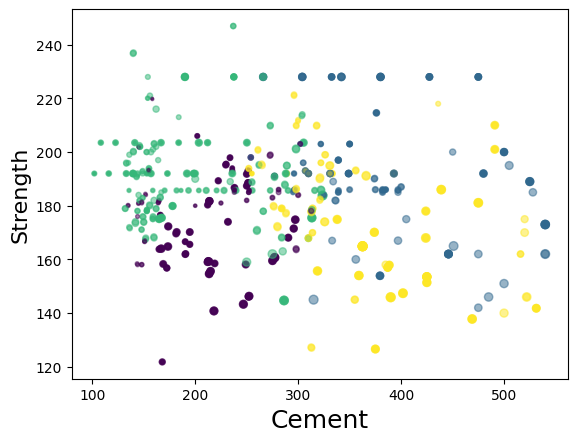

In [32]:

plt.scatter(X[:,0], X[:,3], s=X[:,8]/2, c=labels.astype(float), alpha=0.5)
plt.xlabel('Cement', fontsize=18)
plt.ylabel('Strength', fontsize=16)

plt.show()

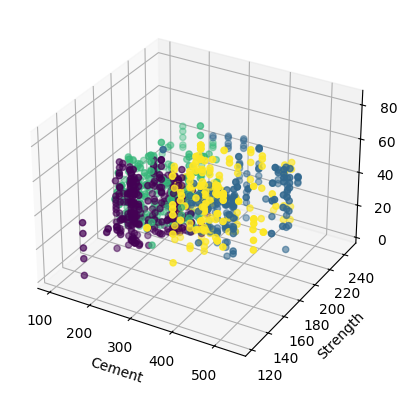

In [33]:
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = plt.axes(projection='3d')


plt.cla()
plt.xlabel('Cement', fontsize=10)
plt.ylabel('Strength', fontsize=10)
ax.set_xlabel('Cement')
ax.set_ylabel('Strength')
ax.set_zlabel('Water')

ax.scatter(X[:, 0], X[:, 3], X[:, 8], c= labels.astype(float))


k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

- AFFLUENT, EDUCATED AND OLD AGED
- MIDDLE AGED AND MIDDLE INCOME
- YOUNG AND LOW INCOME
